# 연관규칙 분석 (Association Rule Mining)
## 1. 개요
- 소비자 또는 일련의 사용자 그룹의 행동 간에 존재하는 동시 발생 관계를 분석하는 알고리즘
- 대규모 DB에 존재하는 아이템 간의 관계를 규명하기 위해 사용하는 방법
- 장바구니 분석(Market Basket Analysis) 또는 친밀도 분석(Affinity Analysis)라고도 불림
- Ex) 월마트 사례
    * 맥주와 기저귀를 비슷한 곳에 진열하니 매출이 향상됨 => 남편이 마트에 들러 물건을 살 때 부인의 부탁으로 아이 기저귀를 사면서 동시에 본인이 마실 맥주를 산다는 구매 패턴을 발견
    * 즉, 데이터 분석을 통해 **전혀 관련성이 없는 맥주와 기저귀의 연결고리**를 알게되어 마케팅 전략에 반영한 사례

## 2. 장점
- 장바구니로 정의되는 하나의 Entity(장바구니)와 그 장바구니에 기록된 품목 이름(맥주, 기저귀)만 있다면 바로 분석이 가능함 -> 많은 조건을 고려하느라 소요되는 시간을 벌 수 있음
- 특별한 domain knowledge가 없어도, 유의미한 여러 패턴을 식별 할 수 있음
- 반드시 추천 시스템이 아니더라도, 다양한 목적에 맞게 분석을 응용하여 쓸 수 있음

## 3. 단점
- 상품(item) 간의 인과관계는 알 수 없음, 즉 선행여부는 반영될 수 없음
    * 인과관계 : 기저귀를 사면, 맥주도 삼(p→q) 
    * 상관관계 :
        * 기저귀랑 맥주 둘다 삼
        * 기저귀를 담은 고객(p)은 맥주도 담을(q) 확률(=P(q∣p))이 높다고는 할 수 있으나, 그렇다고 기저귀를 담지 않으면(!p) 맥주도 담지 않을(!q) 확률이 높다'가 성립할 수 없음
- 상품 별 수량은 고려되지 않음
- 상품명 외에는 어떤 변수도 고려되지 않음

예시 이미지  
![img](imgs/AssociationBurger.png) 

## 4. 알고리즘
1. 규칙 발견
    1. 특정 제품을 함께 구매할 가능성 : 햄버거 패티를 사는 사람은 햄버거 롤, 케펍, 머스타드, 토마토 등을 함께 사는 경향이 있음
    2. 상품 친밀도가 모호한 경우 :
        * 치약 & 참치캔 : 일부 지역에서는 참치 요리를 한 후 즉각적으로 칫솔질하는 지역이 있을 수도 있지만 일반적으로 친밀도가 약함
    3. 영수증 한 장을 하나의 거래로 보고 한 줄에 기록
    4. 지지도(Support)
        - 해당 아이템이 포함된 거래의 비율
        - 품목A & 품목B 포함 거래수 / 전체 거래수
        - Num of {감자, 햄버거} / Total
    5. 신뢰도(Cofidence)
        - 예측의 정확성
        - 항목A의 거래 중에서 항목 B가 포함된 거래의 비율
        - {양파, 햄버거} -> {맥주} : 100% 신뢰도
    6. 향상도(Lift)
        - A->B의 연관규칙에서 임의로 B가 구매되는 경우에 비해 A와의 관계가 고려되어 구매되는 경우의 비율
        - Lift = 1 => 독립적 관계
        - Lift > 1 => 양의 상관관계 (맥주 & 안주)
        - Lift < 1 => 음의 상관관계 (설사약 & 변비약)
        
## 5. 관련 통계
- 개별 확률
    * P(A) : 상품 A를 구매할 확률
    * P(B) : 상품 B를 구매할 확률
- 지지도
    * A와 B를 동시에 구매할 확률
    * 동시거래 건수 / 전체거래 건수
- 신뢰도
    * A를 구매한 거래 중에서 B를 구매한 확률
    * 지지도 / P(A) 
- 향상도
    * A -> B 의 연관규칙에서 임의로 B가 구매되는 경우에 비해서 A와의 관계가 고려되어 구매되는 경우의 비율
    * 신뢰도 / P(B)
    * 향상도 > 1 => 양의관계이므로 동시 구매 가능성 ⬆️



## 6. 알고리즘 종류

### 선험적 알고리즘(Apriori 알고리즘)
- 개념
    - 거리 관련 빈도 패턴 마이닝으로 연관 규칙 학습에 사용되는 알고리즘
    - 모든 아이템셋을 찾기보다는 아주 빈번한 아이템셋의 특성만을 찾음
    - 드물게 나타나는 조합을 무시하여 아이템셋의 크기를 줄여줌

- 장점
    - 원리가 간단해서 쉽게 이해할 수 있고 이 의미를 쉽게 파악할 수 있음
    - 유의한 연관성을 갖는 구매패턴을 다양하게 찾아줌

- 단점
    - 데이터가 크다면 속도가 느리고 연산량이 많아짐
    - 실제 알고리즘을 사용하게 되면 너무 많은 연관상품들이 나타나는 문제 발생
    - 연관 상품들이 상관관계는 의미하지만 그것이 인과를 의미하지 않기 때문에, 결과만을 본다면 어떤 것이 원인인지 파악하기 힘듬

- 알고리즘 원리
    1. k개의 아이템을 가지고 단일항목집단 생성
    2. 단일항목집단에서 지지도 계산 후 최소 지지도 이상의 항목만 선택
    3. 2에서 선택된 항목 만을 대상으로 2개항목집단 생성
    4. 2개항목집단에서 최소 지지도 혹은 신뢰도 이상의 항목만 선택
    5. 위의 과정을 k개의 k-item frequent set을 생성할 때까지 반복

- 연관도 추출 방법
    * Association Rule을 적용하여 지지도(Support), 신뢰도(Confidence) 그리고 향상도(Lift)


### 반발 패턴 성장 알고리즘(FP Growth 알고리즘, Frequent Pattern)
- 개념
    - **Tree** 구조를 통해 **Apriori 알고리즘을 개선**한 알고리즘
    - 데이터셋에서 해당 아이템의 발생 횟수를 측정한 후 문자열을 저장할 수 있는 순차적인 데이터 구조를 지닌 트리를 생성함
    - 다수 거래에서 가장 빈번히 등장하는 아이템을 트리 뿌리와 가장 가까운 요소로서 나타냄

- 장점
    - Tree구조이기 때문에 Apriori보다 훨씬 빠름, DB에서 스캔하는 횟수도 줄어듬. 
        - Apriori : 최소 한 번의 DB스캔에서부터 가장 긴 트랜잭션의 아이템 셋을 뒤져야 할 가능성 존재
        - FP-Growth : 첫번째 스캔으로 단일 항목집단을 만들고, 두 번째 스캔으로 Tree구조를 - 완성합니다. 완성한 FP-Tree를 이용해서 분석하면 되니까, 딱 2번만 스캔하면 됨
            - 후보 Itemset을 생성할 필요없이, Tree만 구성하면 끝임

- 단점
    - 대용량 데이터 셋에서 메모리를 효율적으로 사용하지 않음
    - Apriori에 비해 설계하기 어렵고, 서포트의 계산은 무조건 FP-Tree가 만들어져야 가능함

- 알고리즘 원리
    1. 모든 거래를 확인해 각 아이템마다의 서포트를 계산하고 최소 지지도 이상의 아이템만 선택
    2. 모든 거래에서 빈도가 높은 아이템 순서대로 순서를 정렬(여기서 부터 달라짐)
    3. 부모 노드를 중심으로 거래를 자식노드로 추가해주면서 tree를 생성
    4. 새로운 아이템이 나올 경우에는 부모노드부터 시작하고, 그렇지 않으면 기존의 노드에서 확장
    5. 위의 과정을 모든 거래에 대해 반복하여 FP Tree를 만들고 최소 지지도 이상의 패턴만을 추출

### [실습] 연관규칙 분석 실습 - 1. 식품

   support      itemsets
0     0.50          (사과)
1     1.00          (생수)
2     0.75          (치즈)
3     0.50          (호두)
4     0.50      (생수, 사과)
5     0.75      (생수, 치즈)
6     0.50      (생수, 호두)
7     0.50      (치즈, 호두)
8     0.50  (생수, 치즈, 호두)
   support      itemsets
0     1.00          (생수)
1     0.75          (치즈)
2     0.50          (사과)
3     0.50          (호두)
4     0.75      (생수, 치즈)
5     0.50      (생수, 사과)
6     0.50      (치즈, 호두)
7     0.50      (생수, 호두)
8     0.50  (생수, 치즈, 호두)


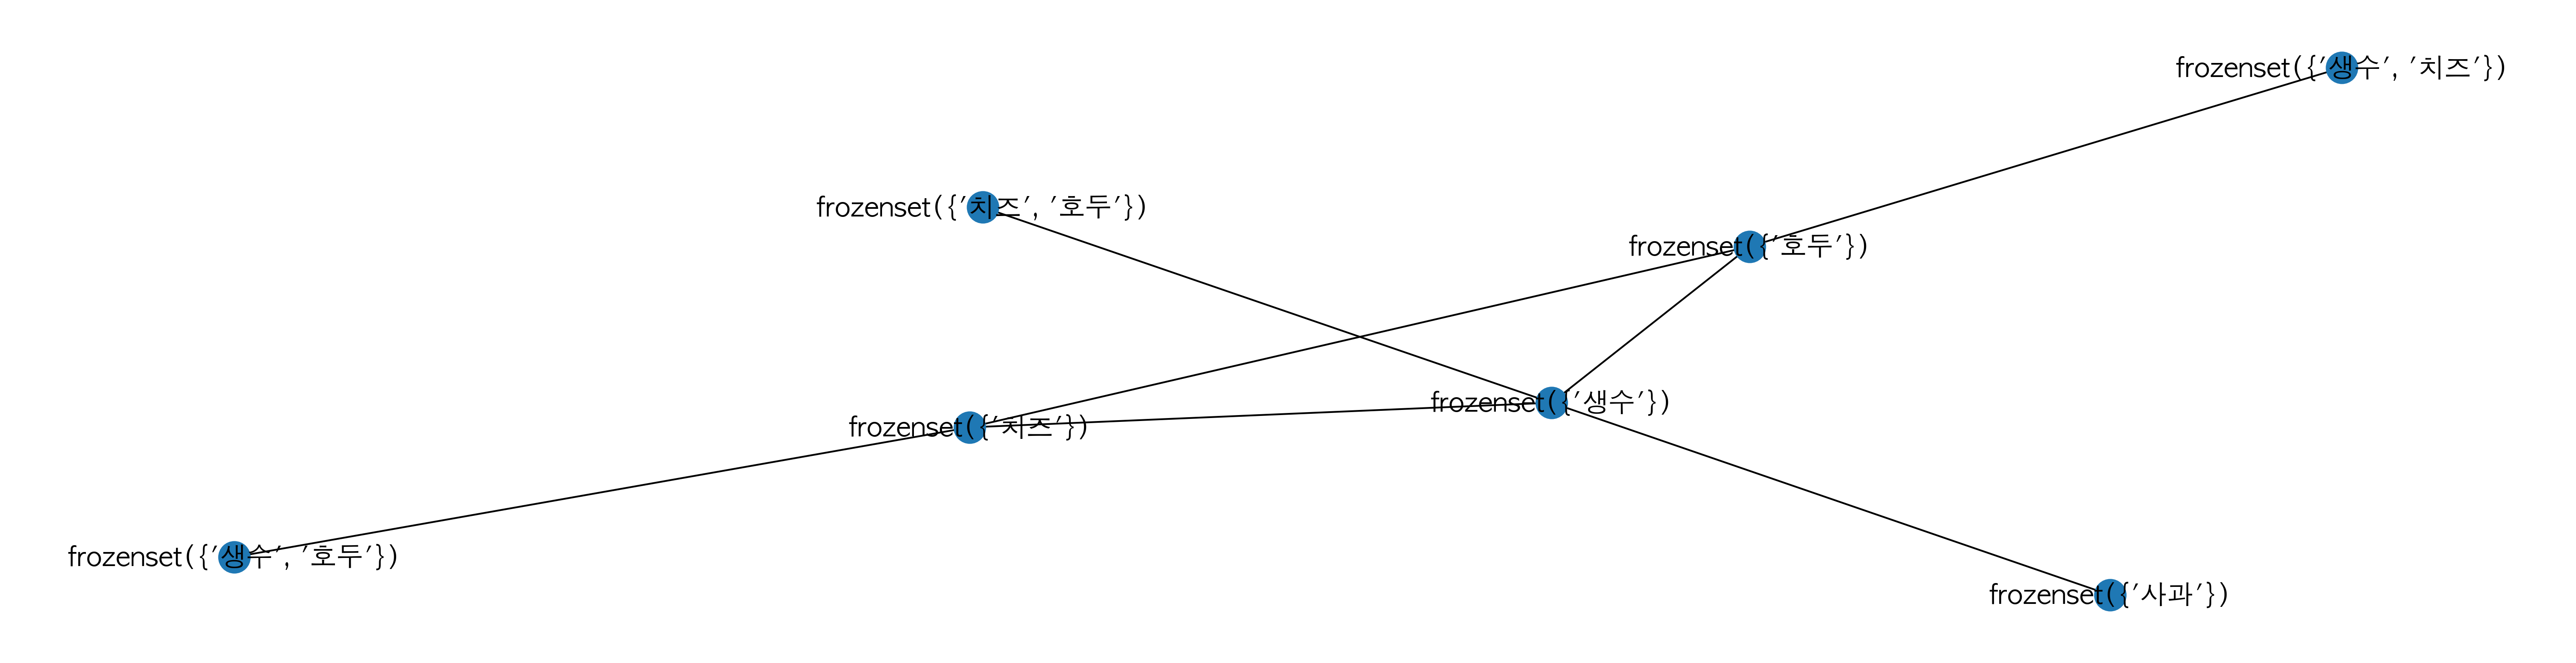

In [2]:
dataset = [
    ['🍎','🧀','💧'], 
    ['💧', '🥜','🧀','🐟'], 
    ['🍉','🍎','💧'], 
    ['💧','🥜','🧀','🌽']
]
dataset = [
    ['사과','치즈','생수'], 
    ['생수', '호두','치즈','고등어'], 
    ['수박','사과','생수'], 
    ['생수','호두','치즈','옥수수']
]

from mlxtend.preprocessing import TransactionEncoder
import pandas as pd

# Transaction 자료형으로 변환
# X : 전체 품목, y : 거래 아이디 (한장의 영수증)
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)

# DataFrame으로 변환
df = pd.DataFrame(te_ary, columns = te.columns_)

# Apriori 알고리즘
from mlxtend.frequent_patterns import apriori
frequent_itemsets = apriori(df, min_support=0.5, use_colnames=True)
print(frequent_itemsets) #사과 살 확률 50%, 치즈 & 생수 살 확률 75%

# FP-Growth 알고리즘
# !pip install --upgrade mlxtend : 오류 날 경우 해당 명령어로 mlxtend를 업그레이드 시켜줌
from mlxtend.frequent_patterns import fpgrowth
frequent_itemsets = fpgrowth(df, min_support=0.5, use_colnames=True)
print(frequent_itemsets) 

# confidence > 0.3 (기본값 0.8)
from mlxtend.frequent_patterns import association_rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3)
# print(rules) # antecedents: 조건절, consequents: 결과절

#결과 시각화
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rc
# 한글폰트 설정
font = rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.dpi'] = 300

import networkx as nx
ga = nx.from_pandas_edgelist(rules, source='antecedents', target='consequents') #source: 그래프의 안쪽 노드, target: 그래프의 바깥쪽 노드
plt.figure(figsize=(20,5)) 
nx.draw(ga, with_labels=True, font_family= font, font_size=15)
